In [1]:
import pandas as pd

In [51]:
def split_day(x):
    return int(x.split('/')[1])

def split_month(x):
    return int(x.split('/')[0])

def split_year(x):
    return int(x.split('/')[2])

def season(x):
    if x in [12,1,2]:
        return('winter')
    elif x in [3,4,5]:
        return('spring')
    elif x in [6,7,8]:
        return('summer')
    elif x in [9,10,11]:
        return('fall')


## Read file

In [150]:
road_file = pd.read_csv('../road_file.csv',names=["RDWY_LINK_ID","REF_SITE_FROM_ID","REF_SITE_TO_ID"])

In [184]:
crash_data =  pd.read_csv('crash-data-link-2017-2020.csv')

In [185]:
crash_data

,DOCTNMBR,REPTTYPE,CRSHDATE,NTFYHOUR,CNTYNAME,MUNINAME,MUNITYPE,LOCTYPE,ONHWY,ONHWYSYS,...,DRUGFLAG,INJTRNS,MOPFLAG,PEDFLAG,SFTYFLAG,SPEEDFLAG,TEENDRVR,RDWY_LINK_ID,RDWY_LINK_OSET,LINK_HIST_FLAG
0,02L0Z90C3C,DT4000,1/3/2017,7,DANE,MIDDLETON,T,PP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5157272,363.0,NaN
1,02L121PTJP,DT4000,1/3/2017,7,DANE,CROSS PLAINS,T,I,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,5064363,7973.0,NaN
2,1KL05BGSFC,DT4000,1/3/2017,7,DANE,MIDDLETON,C,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842406,233.0,NaN
3,1KL072BC3C,DT4000,1/3/2017,8,DANE,MIDDLETON,C,I,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,Y,NaN,5064246,845.0,NaN
4,02L11S9LVP,DT4000,1/3/2017,10,DANE,CROSS PLAINS,T,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4823838,339.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1KL07TS2D4,DT4000,12/30/2020,1,DANE,MIDDLETON,C,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5285777,593.0,NaN
1875,1KL091L4JV,DT4000,12/30/2020,1,DANE,MIDDLETON,C,I,M,CTH,...,NaN,NaN,NaN,NaN,NaN,Y,Y,4819969,15.0,NaN
1876,24L04HS273,DT4000,12/30/2020,12,DANE,CROSS PLAINS,V,I,P,CTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5372934,259.0,NaN
1877,1KL0990C52,DT4000,12/31/2020,10,DANE,MIDDLETON,C,I,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5040838,79.0,NaN


## Seasonal analysis

In [186]:
crash_data.head()

,DOCTNMBR,REPTTYPE,CRSHDATE,NTFYHOUR,CNTYNAME,MUNINAME,MUNITYPE,LOCTYPE,ONHWY,ONHWYSYS,...,DRUGFLAG,INJTRNS,MOPFLAG,PEDFLAG,SFTYFLAG,SPEEDFLAG,TEENDRVR,RDWY_LINK_ID,RDWY_LINK_OSET,LINK_HIST_FLAG
0,02L0Z90C3C,DT4000,1/3/2017,7,DANE,MIDDLETON,T,PP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5157272,363.0,NaN
1,02L121PTJP,DT4000,1/3/2017,7,DANE,CROSS PLAINS,T,I,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,5064363,7973.0,NaN
2,1KL05BGSFC,DT4000,1/3/2017,7,DANE,MIDDLETON,C,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842406,233.0,NaN
3,1KL072BC3C,DT4000,1/3/2017,8,DANE,MIDDLETON,C,I,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,Y,NaN,5064246,845.0,NaN
4,02L11S9LVP,DT4000,1/3/2017,10,DANE,CROSS PLAINS,T,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4823838,339.0,NaN


In [187]:
crash_data['day'] = crash_data['CRSHDATE'].apply(split_day)
crash_data['month'] = crash_data['CRSHDATE'].apply(split_month)
crash_data['year'] = crash_data['CRSHDATE'].apply(split_year)
crash_data['season'] = crash_data['month'].apply(season)

<AxesSubplot:xlabel='month'>

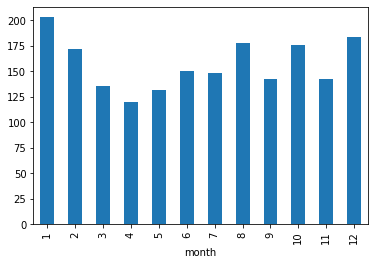

In [188]:
crash_data.groupby('month').count()['DOCTNMBR'].plot.bar()

<AxesSubplot:xlabel='season'>

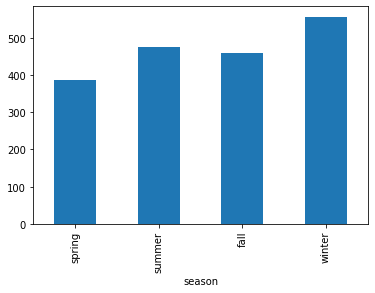

In [55]:
crash_data.groupby('season').count()['DOCTNMBR'].reindex(['spring','summer','fall','winter']).plot.bar()

<AxesSubplot:xlabel='year'>

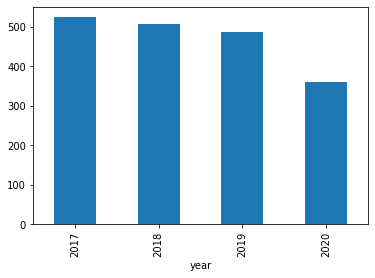

In [60]:
crash_data.groupby('year').count()['DOCTNMBR'].plot.bar()

<AxesSubplot:xlabel='NTFYHOUR'>

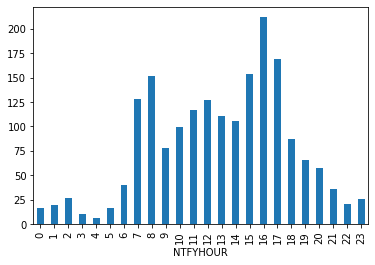

In [61]:
crash_data.groupby('NTFYHOUR').count()['DOCTNMBR'].plot.bar()

## Create seasonal crash dataset

In [72]:
crashes = {}
# spring

crashes['spring'] = crash_data[crash_data['season']=='spring']

# summer

crashes['summer'] = crash_data[crash_data['season']=='summer']

# fall

crashes['fall'] = crash_data[crash_data['season']=='fall']

#winter

crashes['winter'] = crash_data[crash_data['season']=='winter']

,DOCTNMBR,REPTTYPE,CRSHDATE,NTFYHOUR,CNTYNAME,MUNINAME,MUNITYPE,LOCTYPE,ONHWY,ONHWYSYS,...,SFTYFLAG,SPEEDFLAG,TEENDRVR,RDWY_LINK_ID,RDWY_LINK_OSET,LINK_HIST_FLAG,day,month,year,season
80,02L0XWW13L,DT4000,3/1/2017,7,DANE,CROSS PLAINS,T,N,P,CTH,...,NaN,Y,NaN,4848831,4824.0,NaN,1,3,2017,spring
81,02L0Z90C3L,DT4000,3/1/2017,9,DANE,MIDDLETON,T,N,NaN,NaN,...,NaN,Y,NaN,4819528,1159.0,NaN,1,3,2017,spring
82,1KL0597RBF,DT4000,3/1/2017,10,DANE,MIDDLETON,C,I,NaN,NaN,...,NaN,NaN,NaN,4841696,1214.0,NaN,1,3,2017,spring
83,1KL05BGSFQ,DT4000,3/1/2017,15,DANE,MIDDLETON,C,N,M,CTH,...,NaN,NaN,Y,4841262,301.0,NaN,1,3,2017,spring
84,1KL0597RBG,DT4000,3/2/2017,16,DANE,MIDDLETON,C,PL,NaN,NaN,...,NaN,NaN,NaN,4849516,227.0,NaN,2,3,2017,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,1KL097RB2X,DT4000,5/14/2020,14,DANE,MIDDLETON,C,N,12,USH,...,NaN,NaN,NaN,5516764,1022.0,NaN,14,5,2020,spring
1662,1KL07W13F0,DT4000,5/16/2020,11,DANE,MIDDLETON,C,I,14,USH,...,NaN,NaN,NaN,5488971,11.0,NaN,16,5,2020,spring
1663,02L0Z7RB9L,DT4000,5/18/2020,11,DANE,CROSS PLAINS,T,N,NaN,NaN,...,NaN,Y,NaN,4823740,3567.0,NaN,18,5,2020,spring
1664,1KL09B7D7K,DT4000,5/21/2020,12,DANE,MIDDLETON,C,PL,NaN,NaN,...,NaN,NaN,NaN,5120288,808.0,NaN,21,5,2020,spring


In [75]:
#count the crash on each road
crash_count = {'spring':{},'summer':{},'fall':{},'winter':{}}
for s in ['spring','summer','fall','winter']:
    for road in crashes[s]['RDWY_LINK_ID']:
        if road not in crash_count[s]:
            crash_count[s][road] = 1
        else:
            crash_count[s][road] += 1
        
for s in ['spring','summer','fall','winter']:
    for road in road_file["RDWY_LINK_ID"]:
        if road not in crash_count[s]:
            crash_count[s][road] = 0

crash_column = {'spring':None,'summer':None,'fall':None,'winter':None}

for s in ['spring','summer','fall','winter']:
    crash_column[s] = [ crash_count[s][road] for road in road_file["RDWY_LINK_ID"]]

In [82]:
sum(crash_column['winter'])

547

In [83]:
seasonal_crash_file = road_file.copy()

In [85]:
for s in ['spring','summer','fall','winter']:
    seasonal_crash_file[s] = crash_column[s]

seasonal_crash_file = seasonal_crash_file[['REF_SITE_FROM_ID','REF_SITE_TO_ID','spring','summer','fall','winter']]

In [92]:
seasonal_crash_file.to_csv("seasonal_crash_file.csv", index=False, header=True)
!csv2gdx seasonal_crash_file.csv useHeader=Y id=season_crash index=1,2 value=3,4,5,6 colCount=6

No errors, CSV2GDX time = 32ms


In [91]:
seasonal_crash_file

,REF_SITE_FROM_ID,REF_SITE_TO_ID,spring,summer,fall,winter
0,1661200,1660820,0,0,0,0
1,1661678,1661705,0,0,0,0
2,1661704,1661705,0,0,0,0
3,1661723,1661697,0,0,0,0
4,1661705,1661723,0,0,0,0
...,...,...,...,...,...,...
3127,1663210,1663276,0,0,0,0
3128,1661558,1661551,0,0,0,0
3129,1661551,1661558,0,0,0,0
3130,2016715,2005025,0,0,0,0


## Adding seriousness to the data file

In [279]:
crashes = crash_data[['RDWY_LINK_ID','season','INJSVR','DOCTNMBR']]

In [280]:
crashes = crashes.groupby(['RDWY_LINK_ID','season','INJSVR']).count()

In [281]:
crashes = crashes.reset_index(level=['RDWY_LINK_ID', 'season','INJSVR'])

In [282]:
crashes.head()

,RDWY_LINK_ID,season,INJSVR,DOCTNMBR
0,4819137,summer,O,1
1,4819138,winter,A,1
2,4819145,summer,O,1
3,4819274,summer,O,1
4,4819275,fall,B,1


In [283]:
crashes = crashes.merge(road_file, on='RDWY_LINK_ID', how='inner')

In [284]:
crashes = crashes[['REF_SITE_FROM_ID','REF_SITE_TO_ID','season','INJSVR','DOCTNMBR']]

In [285]:
crashes.to_csv('crash_seriousness.csv',index=False,header=True)

In [286]:
crashes.head()

,REF_SITE_FROM_ID,REF_SITE_TO_ID,season,INJSVR,DOCTNMBR
0,10464,1661744,summer,O,1
1,1661884,1661805,winter,A,1
2,1661887,1661805,summer,O,1
3,1662001,1662000,summer,O,1
4,1662003,1662001,fall,B,1


In [287]:
!csv2gdx crash_seriousness.csv useHeader=Y id=serious_crash index=1,2,3,4 value=5 colCount=5

No errors, CSV2GDX time = 27ms
